<a href="https://colab.research.google.com/github/Nihitha8819/Heart-Disease-Prediction-Using-Deep-Learning/blob/main/chatbot_with_genAPIkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U langgraph langsmith
!pip install -U langchain-anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.0/264.0 kB 14.7 MB/s eta 0:00:00


In [ ]:
!pip install -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
from typing import Annotated

from langchain.chat_models import init_chat_model
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


llm = init_chat_model("anthropic:claude-3-5-sonnet-latest")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

In [ ]:
import os
from langchain.chat_models import init_chat_model

os.environ["GOOGLE_API_KEY"] ="include-your-API-key"

llm = init_chat_model("google_genai:gemini-2.0-flash")

In [ ]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

ValueError: Node `chatbot` already present.

In [ ]:
graph_builder.add_edge(START, "chatbot")

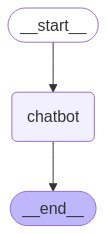

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: what is AI
Assistant: Artificial Intelligence (AI) is a broad field of computer science that aims to create machines that can perform tasks that typically require human intelligence. These tasks include learning, problem-solving, decision-making, perception, and understanding natural language.

Here's a breakdown of key aspects of AI:

**Core Concepts:**

*   **Mimicking Human Intelligence:** At its core, AI seeks to replicate or simulate human cognitive abilities in machines.
*   **Learning and Adaptation:** AI systems are designed to learn from data and improve their performance over time without being explicitly programmed for every possible scenario.
*   **Problem Solving:** AI algorithms are used to find solutions to complex problems, often by exploring vast amounts of data and identifying patterns.
*   **Automation:** AI can automate tasks that are repetitive, time-consuming, or dangerous for humans.

**Types of AI:**

AI can be categorized in several ways. Here are two com

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

# You can use any model you have access to here (Gemini, Claude, GPT, etc.)
llm = init_chat_model("google_genai:gemini-2.0-flash")  # <- use your model

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

def get_bot_reply(user_input):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            return value["messages"][-1].content


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# TextArea for multiline input
input_box = widgets.Textarea(
    placeholder='Type your message...',
    layout=widgets.Layout(width='80%', height='60px')
)
send_button = widgets.Button(description="Send", button_style='primary')
output_area = widgets.Output(layout={'border': '1px solid black', 'height': '300px', 'overflow_y': 'auto'})

# Display chat UI
chat_ui = widgets.VBox([output_area, widgets.HBox([input_box, send_button])])
display(chat_ui)

# Chat handling function
def on_send_click(_):
    user_msg = input_box.value.strip()
    if not user_msg:
        return

    input_box.value = ""  # Clear input after sending
    with output_area:
        print(f"\n👤 You: {user_msg}")

    # Call LangGraph bot
    response = get_bot_reply(user_msg)

    with output_area:
        print(f"🤖 Bot: {response}")

# Bind the button click
send_button.on_click(on_send_click)
